# UNISACSI Examples

This notebook contains a set of example scripts showing how the functions of the unisacsi package can be used to read data collected during fieldwork and create plots.

## Importing packages, setting paths, ...

As in every Python script, first import all packages needed for the following code:

In [1]:
import unisacsi.Ocean as Oc
import unisacsi.Meteo as Met
import unisacsi.universal_func as uf
from unisacsi.MET_model_download import download_MET_model_static_fields, download_MET_model_data
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import gsw
import cmocean as cmo
import glob
import uptide
import xarray as xr

Then, download the folder with the example and map data and save it locally on your computer. Then, specify this location here:

In [2]:
import os       #just used in the example script to combine the path, not needed in other scripts
path_data = '/Users/pselle/Library/CloudStorage/OneDrive-UniversitetssenteretpåSvalbardAS/Svalbard/AGF 213 2025 - unisacsi_example_data'
os.path.exists(path_data)  # check if the path_data exists

True

Now you are ready to dive into the actual examples!

## Oceanography

### CTD

You can use the read_CTD function from the Ocean module of unisacsi to read one or several CTD data file. If you are unsure how to use it, simply check the docs using the help function (PS: this works for any Python function, if the creator has included documentation):

In [3]:
help(Oc.read_CTD)

Help on function read_CTD in module unisacsi.Ocean:

read_CTD(inpath: 'str', cruise_name: 'str' = 'cruise', outpath: 'str' = None, stations: 'npt.ArrayLike' = None, salt_corr: 'tuple[num.Number, num.Number]' = (1.0, 0.0), oxy_corr: 'tuple[num.Number, num.Number]' = (1.0, 0.0), use_system_time: 'bool' = False) -> 'dict'
    This function reads in the CTD data from cnv files in `inpath`
    for the stations `stations` and returns a list of dicts containing
    the data. Conductivity correction (if any) can be specified in `corr`

    Args:
        inpath (str):
            - Path to folder where the where the .cnv files are stored.
            - Path to the .cnv file(s) with UNIX-wildecards ('*' for any character(s), '?' for single character, etc.).
            - Path to a .npy file with the data.
        cruise_name (str, optional): Name of the cruise. Defaults to "cruise".
            - Used to create the name of the output file.
        outpath (str, optional): Path to a folder to sto

As you now know which arguments the function expects, you can use it:

In [4]:
CTD = Oc.read_CTD(os.path.join(path_data,"CTD/"))

Done                                                      


The following stations were duplicated (naming convention: first station (timewise): UnisNum_0, second: UnisNum_1,...):
987 was found 2 times.
507 was found 2 times.
537 was found 2 times.


CTD is a dictionary with one entry per station. Therefore, the keys of CTD are the station numbers:

In [5]:
print(CTD.keys())

dict_keys(['65', '64', '63', '62', '40', '174', '173', '172', '39', '38', '37', '36', '35', '988', '165', '34', '166', '167', '168', '70', '169', '170', '171', '315', '316', '317', '318', '319', '320', '321', '241', '33', '32', '157', '158', '159', '31', '160', '161', '162', '74', '163', '164', '30', '23', '15', '16', '17', '18', '19', '12', '10', '9', '8', '7', '6', '5', '4', '3', '2', '1', '200', '201', '42', '202', '203', '204', '205', '206', '190', '191', '192', '193', '194', '44', '195', '196', '740', '741', '742', '743', '744', '745', '746', '747', '748', '749', '750', '751', '752', '753', '754', '755', '756', '757', '758', '759', '760', '501', '502', '503', '504', '505', '505 CAL', '506', '507_1', '524', '525', '508', '526', '527', '528', '529', '530', '531', '532', '533', '534', '535', '536', '537_1', '549', '550', '551', '552', '553', '554', '555', '556', '557', '558', '559', '560', '991', '987_1', '987_0', '507_0', '537_0'])


Dictionaries can not have duplicated keys. Therefore, if the same UNIS station has been measured several times (and always just named with its station number in the data file), the corresponding key in the dictionary will be labeled with StationName_X (X starting at 0 and going up). If this is the case, there will be a info.

From the previous cells, you have already understood that each station in the dictionary is again a dictionary with the variables as keys. Therefore, you can check the list of variables for one particular station using:

In [6]:
print(CTD["315"].keys())

dict_keys(['P [dbar]', 'D [m]', 'T [degC]', 'C [S/m]', 'OX [ml/l]', 'TURB [FTU]', 'PAR [mumol photons/m^2s]', 'S []', 'T_pot [degC]', 'OX_sat [%]', 'Speed_sound_avg [m/s]', 'sbe_model', 'gps_datetime', 'seasave', 'instrument_type', 'nquan', 'nvalues', 'start_time', 'bad_flag', 'file_type', 'md5', 'datetime', 'filename', 'dnum', 'lat', 'lon', 'z [m]', 'BottomDepth [m]', 'SA [g/kg]', 'CT [degC]', 'SIGTH [kg/m^3]', 'st', 'unis_st'])


There is also a nice way do look into the dictonaries.

In [7]:
uf.present_dict(CTD)

 keys: ['65', '64', '63', '62', '40', '174', '173', '172', '39', '38', '37', '36', '35', '988', '165', '34', '166', '167', '168', '70', '169', '170', '171', '315', '316', '317', '318', '319', '320', '321', '241', '33', '32', '157', '158', '159', '31', '160', '161', '162', '74', '163', '164', '30', '23', '15', '16', '17', '18', '19', '12', '10', '9', '8', '7', '6', '5', '4', '3', '2', '1', '200', '201', '42', '202', '203', '204', '205', '206', '190', '191', '192', '193', '194', '44', '195', '196', '740', '741', '742', '743', '744', '745', '746', '747', '748', '749', '750', '751', '752', '753', '754', '755', '756', '757', '758', '759', '760', '501', '502', '503', '504', '505', '505 CAL', '506', '507_1', '524', '525', '508', '526', '527', '528', '529', '530', '531', '532', '533', '534', '535', '536', '537_1', '549', '550', '551', '552', '553', '554', '555', '556', '557', '558', '559', '560', '991', '987_1', '987_0', '507_0', '537_0']
 first one containing:
 |        P [dbar] : <class 'num

You can add another variable to each station, describing the water mass. You first need to load the definitions for the different water masses:

In [8]:
wm = pd.read_csv(os.path.join(path_data,"water_masses.csv"), sep=";")
CTD = Oc.ctd_identify_water_masses(CTD, wm)
cmap_watermasses = mpl.colors.LinearSegmentedColormap.from_list("wm_colors", [tuple(int(h.lstrip("#")[i:i+2], 16)/255. for i in (0,2,4)) for h in wm["color"].tolist()], N=7)

In order to define a certain section, e.g. the along-fjord section in Isfjorden or the cross section in Nordfjorden, create a list with the corresponding station numbers (in the correct order):

In [9]:
nordfjorden_section = ['315', '316', '317', '318', '319', '320', '321']

Now you can plot e.g. the density profiles from all stations in the section using the following bit of code:

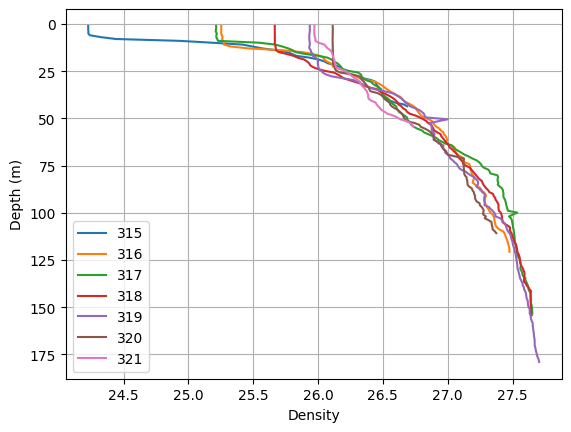

In [10]:
plt.figure()
for station in nordfjorden_section:
    plt.plot(CTD[station]['SIGTH [kg/m^3]'],-CTD[station]['z [m]'],label=station)
plt.gca().invert_yaxis()
plt.xlabel('Density')
plt.ylabel('Depth (m)')
plt.grid()
plt.legend()

For many purposes, having the data stored in nested dictionaries is not very practical. There are several ways of how to re-order the data. You can either convert the data from a single station into a pandas dataframe, with the depth as the index and the variables as columns...

In [11]:
station_df = pd.DataFrame(CTD["315"])
station_df.index = -station_df['z [m]']
print(station_df)

           P [dbar]   D [m]  T [degC]   C [S/m]  OX [ml/l]  TURB [FTU]  \
z [m]                                                                    
43.532139      44.0  43.534    5.0154  3.241283     6.7991       0.528   
42.542875      43.0  42.542    5.1306  3.249646     6.7880       0.511   
41.553607      42.0  41.555    5.4305  3.272251     6.7686       0.531   
40.564333      41.0  40.558    5.7667  3.302327     6.7381       0.503   
39.575056      40.0  39.576    5.8556  3.308350     6.5923       0.348   
38.585773      39.0  38.586    5.7689  3.298014     6.6090       0.367   
37.596485      38.0  37.596    5.7163  3.290609     6.6446       0.390   
36.607193      37.0  36.609    5.6256  3.281137     6.6528       0.410   
35.617896      36.0  35.617    5.5368  3.271122     6.6522       0.449   
34.628594      35.0  34.630    5.4995  3.267536     6.6641       0.468   
33.639287      34.0  33.641    5.4466  3.260262     6.7014       0.488   
32.649975      33.0  32.649    5.4251 

... or you can save the measurements of one particular variable from several stations into a dataframe, again with the depth s index, but the columns now represent the individual stations:

In [12]:
CTD_i,Z,_,_ = Oc.CTD_to_grid(CTD,nordfjorden_section,interp_opt=0)
df_oxygen = pd.DataFrame(CTD_i['OX [ml/l]'],index=Z,columns=nordfjorden_section)
print(df_oxygen)

                 315       316       317       318       319       320  \
0.989467         NaN       NaN       NaN       NaN       NaN       NaN   
1.989614    7.202155  7.043282  7.065267  6.954046  6.826105  6.750426   
2.989760    7.187982  7.059693  7.071210  6.967450  6.826883  6.725756   
3.989907    7.145564  7.046072  7.062039  6.969596  6.839787  6.746400   
4.990054    7.117571  7.054278  7.045049  6.966556  6.841994  6.747303   
...              ...       ...       ...       ...       ...       ...   
175.014991       NaN       NaN       NaN       NaN  6.751495       NaN   
176.015138       NaN       NaN       NaN       NaN  6.761662       NaN   
177.015285       NaN       NaN       NaN       NaN  6.741590       NaN   
178.015432       NaN       NaN       NaN       NaN  6.718171       NaN   
179.015578       NaN       NaN       NaN       NaN  6.719400       NaN   

                 321  
0.989467    6.857400  
1.989614    6.838818  
2.989760    6.822273  
3.989907    6.83032

Xarray datasets provide a good way to store multi-dimensional data, with several coordinates that can be used for accessing and plotting. The whole CTD-dictionary can be transformed into an xarray dataset using

In [13]:
ds_CTD = Oc.CTD_to_xarray(CTD)

The following variables were assigned to the nearest grid point: ['water_mass_Abbr']
If two values are close to a grid point, the lower one is selected.


In the dataset, each measured variable is defined as function of station and depth. During the transformation, all data has automatically been gridded onto the same 1-m depth grid.

In [14]:
print(ds_CTD)

<xarray.Dataset> Size: 37MB
Dimensions:          (station: 138, depth: 1975)
Coordinates:
    time             (station) datetime64[ns] 1kB 2024-09-25T14:52:32 ... 202...
  * station          (station) <U7 4kB '987' '65' '64' ... '560' '991' '987'
    ship_station     (station) int64 1kB 1263 1265 1266 1267 ... 1400 1402 1404
    lat              (station) float64 1kB 78.13 78.19 78.18 ... 78.06 78.12
    lon              (station) float64 1kB 14.41 13.62 13.63 ... 13.53 14.41
    bottom_depth     (station) float64 1kB 156.0 28.0 269.0 ... 33.0 220.0 148.0
  * depth            (depth) float64 16kB 1.0 2.0 3.0 ... 1.974e+03 1.975e+03
Data variables: (12/17)
    OX_sat           (depth, station) float64 2MB nan nan nan ... nan nan nan
    SA               (depth, station) float64 2MB nan nan nan ... nan nan nan
    S                (depth, station) float64 2MB nan nan nan ... nan nan nan
    Speed_sound_avg  (depth, station) float64 2MB nan nan nan ... nan nan nan
    CT               (d

You might want to have a look at a map to see, where the stations are located (This function is so far only compatible with the CTD dictionary, not the xarray dataset).

(<Figure size 640x480 with 1 Axes>, <GeoAxes: >)

<Figure size 640x480 with 0 Axes>

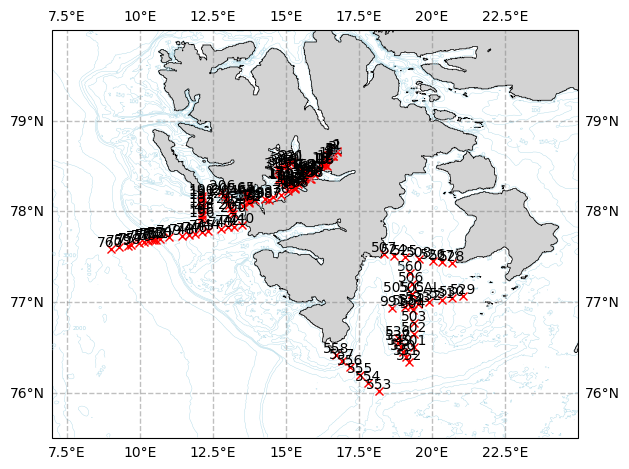

In [15]:
plt.figure()
Oc.plot_CTD_map(CTD, extent=[7.,25.,75.5,80.], topography=os.path.join(path_data,"Svalbard_map_data/bathymetry_svalbard.mat"))

Like this, the map is not very helpful. Let's focus on the Nordfjorden section again:

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


(<Figure size 640x480 with 1 Axes>, <GeoAxes: >)

<Figure size 640x480 with 0 Axes>

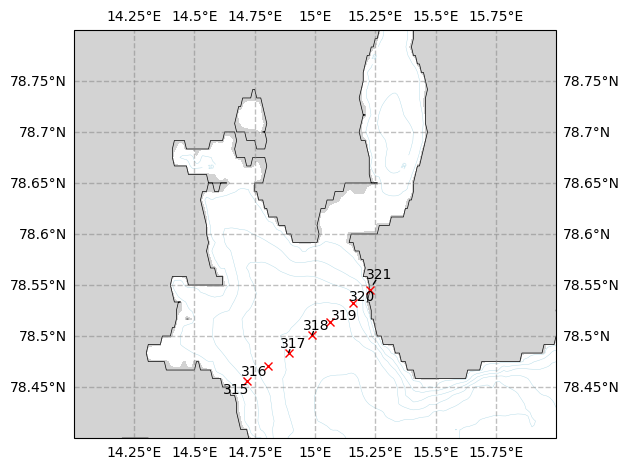

In [16]:
plt.figure()
Oc.plot_CTD_map(CTD, extent=[14.,16.,78.4,78.8], stations=nordfjorden_section, topography=os.path.join(path_data,"Svalbard_map_data/bathymetry_svalbard.mat"),
                adjust_text=True)

Much better! Are you wondering how the temperature along this section looks like?

(<Axes: xlabel='Distance [km]', ylabel='Depth [m]'>,
 <matplotlib.contour.QuadContourSet at 0x176311430>)

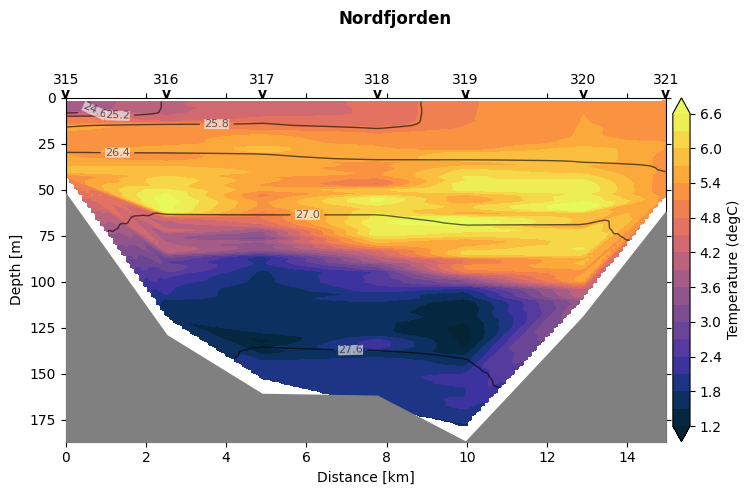

In [17]:
Oc.plot_CTD_single_section(CTD, nordfjorden_section, parameter='T [degC]',
                               clabel='Temperature (degC)',
                              cmap='cmo.thermal',section_name='Nordfjorden')

If you are not a fan of the interpolation, you can simply change the corrspeonding argument in the function call (Check the documentation using the help function!):

(<Axes: xlabel='Distance [km]', ylabel='Depth [m]'>,
 <matplotlib.contour.QuadContourSet at 0x1758b1ac0>)

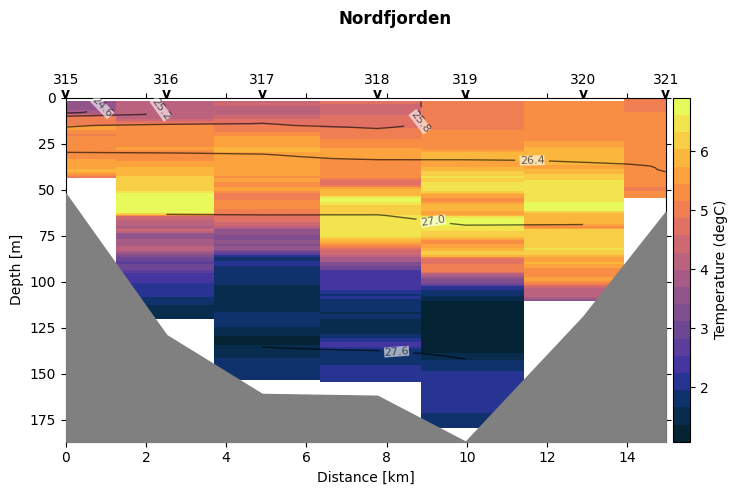

In [18]:
Oc.plot_CTD_single_section(CTD, nordfjorden_section, parameter='T [degC]',
                               clabel='Temperature (degC)',
                              cmap='cmo.thermal',section_name='Nordfjorden', interp_opt=0)

You can also plot the water mass distribution for the section:

Text(0, 0.5, 'Water Masses')

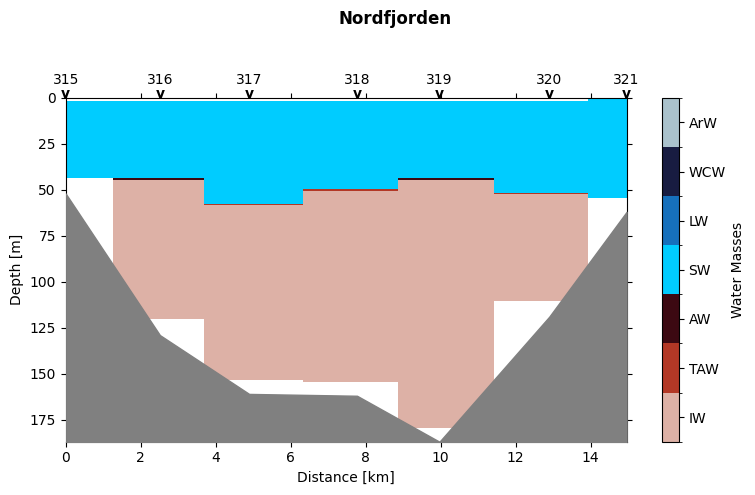

In [19]:
ax, pic, _ = Oc.plot_CTD_single_section(CTD, nordfjorden_section, "Nordfjorden", parameter="water_mass", cmap=cmap_watermasses,
                                        clevels=np.linspace(-0.5,6.5,8),
                                        contourlevels=[-4.], cbar=False, interp_opt=0)
cbar = plt.colorbar(pic, ax=ax, extend="neither", extendrect=True)
cbar.ax.set_yticks(np.arange(7))
cbar.ax.set_yticklabels(wm["Abbr"].tolist())
cbar.ax.set_ylabel("Water Masses")

Finally, T-S diagrams are very useful to investigate e.g. the origin and interaction of water masses. A quick way to plot a T-S diagram of all stations in the Storfjorden section is the following function:

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Absolute Salinity [g kg$^{-1}$]', ylabel='Conservative Temperature [$^\\circ$C]'>)

<Figure size 640x480 with 0 Axes>

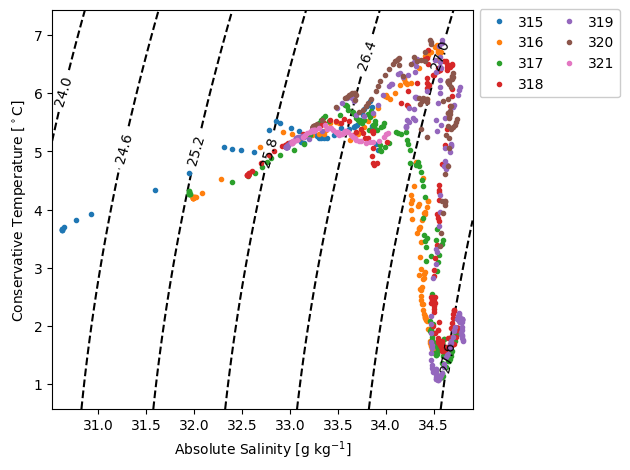

In [20]:
plt.figure()
Oc.plot_CTD_ts(CTD,nordfjorden_section)

If you want to adjust the plot to your individual needs, you can simply create an empty T-S diagram first, and then add the data manually. Instead of coloring the dots according to the station they were measured at, you can color them according to e.g. oxygen content instead:

(34.0, 35.5)

<Figure size 640x480 with 0 Axes>

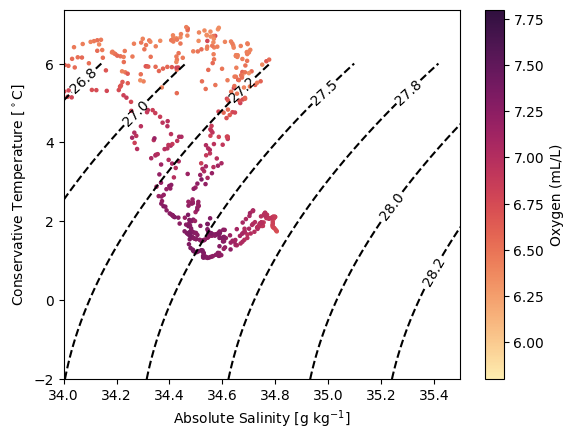

In [21]:
plt.figure()
Oc.create_empty_ts(T_extent=[-2., 6.],S_extent=[34.,35.5])
for station in nordfjorden_section:
    S = plt.scatter(CTD[station]['SA [g/kg]'],CTD[station]['CT [degC]'],
                s=5,c=CTD[station]['OX [ml/l]'],cmap='cmo.matter',
                   vmin=5.8,vmax=7.8)
plt.colorbar(S,label='Oxygen (mL/L)')
plt.xlim([34.,35.5])

### ADCP

Ship-mounted ADCP data will be processed by one of the teachers using a software package called CODAS and WinADCP. Furthermore, you will get data from the lowered ADCP.

The lowered ADCP measures one profile at every CTD station. In the data file, the stations are identified by their number from the ship log (not the UNIS station number). In order to co-locate LADCP and CTD data (give the individual profiles the same idientifier --> UNIS station number), you have to to provide the read function an additional dict with the translation:

In [22]:
ds_ladcp = Oc.read_LADCP(os.path.join(path_data,"LADCP/LADCP_HH202409_STA.mat"), station_dict=CTD, switch_xdim='station')
print(ds_ladcp)

<xarray.Dataset> Size: 10MB
Dimensions:         (station: 123, depth: 1972)
Coordinates:
  * station         (station) object 984B '64' '63' '62' ... '559' '991' '987_1'
  * depth           (depth) float64 16kB 0.0 1.0 2.0 ... 1.97e+03 1.971e+03
    ship_station    (station) uint16 246B 1266 1267 1268 1270 ... 1399 1402 1404
    lat             (station) float64 984B 78.18 78.16 78.14 ... 78.06 78.12
    lon             (station) float64 984B 13.63 13.66 13.68 ... 13.52 14.41
    bottom_depth    (station) uint16 246B 275 399 391 262 ... 243 100 222 152
Data variables:
    u               (depth, station) float64 2MB 0.0 0.0 0.0 0.0 ... nan nan nan
    v               (depth, station) float64 2MB 0.0 0.0 0.0 0.0 ... nan nan nan
    u_detide        (depth, station) float64 2MB 0.0 0.0 0.0 0.0 ... nan nan nan
    v_detide        (depth, station) float64 2MB 0.0 0.0 0.0 0.0 ... nan nan nan
    velocity_error  (depth, station) float64 2MB 0.0 0.0 0.0 0.0 ... nan nan nan
    time            

The vessel-mounted ADCP measures constantly (not only at the CTD stations). Consequently, "station" is not a good dimsension for the dataset. We rather want to use time:

In [23]:
ds_codas = Oc.read_ADCP_CODAS(os.path.join(path_data,"VMADCP/CODAS/os75bb_short_STA.nc"))
ds_winadcp = Oc.read_WinADCP(os.path.join(path_data,"VMADCP/WinADCP/AGF214_202409_016_STA.mat"))
print(ds_winadcp)
print(ds_codas)

<xarray.Dataset> Size: 6MB
Dimensions:           (time: 1768, depth: 65)
Coordinates:
  * time              (time) datetime64[ns] 14kB 2024-09-25T21:39:51 ... 2024...
  * depth             (depth) float64 520B 16.0 24.0 32.0 ... 512.0 520.0 528.0
    lat               (time) float64 14kB 78.13 78.13 78.13 ... 77.68 77.68
    lon               (time) float64 14kB 13.68 13.69 13.69 ... 10.43 10.43
Data variables: (12/17)
    T                 (time) float64 14kB 4.79 4.84 4.88 4.91 ... 7.77 7.77 7.76
    u_raw             (depth, time) float64 919kB -0.542 -0.516 ... -32.77
    v_raw             (depth, time) float64 919kB 2.916 3.371 ... -32.77 -32.77
    pg                (depth, time) float64 919kB 1.0 1.0 1.0 ... 0.0 0.0 0.0
    u_ship            (time) float64 14kB 0.503 0.558 0.578 ... 0.058 -0.002
    v_ship            (time) float64 14kB -2.849 -3.394 -3.585 ... -0.021 -0.057
    ...                ...
    u                 (depth, time) float64 919kB -0.039 0.042 ... -32.71 -32.

You might notice that "depth" in the Codas dataset is not a dimension. This is because depending on the processing settings, the depth cells translate into different depth levels. With the following function, you can split the original dataset in subparts, which have a depth as dimension:

In [24]:
list_ds_codas = Oc.split_CODAS_resolution(ds_codas)
ds_codas = list_ds_codas[0]

In this example case, the list has only one element, so we simply overwrite the variable ds_codas. If several depth resolutions were used, the list might have more than one element, and you have to pick the element with the data you need.

In order to interpret the sections measured by the VM-ADCP without the influence of the tides, you need to de-tide the data:

For that you need to download the model data, for that you can uncomment the next cell:

In [25]:
#Oc.download_tidal_model(outpath=os.path.join(path_data, "Tidal_models/"))

In [ ]:
ds_codas = Oc.detide_VMADCP(ds_codas, os.path.join(path_data,"Tidal_models/"), "Arc2kmTM")
ds_winadcp = Oc.detide_VMADCP(ds_winadcp, os.path.join(path_data,"Tidal_models/"), "Arc2kmTM")

Afterwards, you also want to calculate the current speed perpendicular to the ship's track:

In [27]:
ds_codas = Oc.VMADCP_calculate_crossvel(ds_codas)
ds_winadcp = Oc.VMADCP_calculate_crossvel(ds_winadcp)

You are typically only interested in one or two sections. You can extract one section from the LADCP and the CTD dataset like shown below:

In [28]:
ds_CTD_nf = Oc.section_to_xarray(ds_CTD,nordfjorden_section)
ds_ladcp_nf = Oc.section_to_xarray(ds_ladcp,  ['316', '317', '318', '319', '320', '321'])   #nordfjorden_section, but without 315 since it is not in the data

There are duplicate station numbers in the dataset. Using the first occurrence of each station.


You can see that there were multiple measurements at some stations. To find out where, you can use Oc.xarray_inspect_duplicates:

In [29]:
help(Oc.xarray_inspect_duplicates)

Help on function xarray_inspect_duplicates in module unisacsi.Ocean:

xarray_inspect_duplicates(ds: 'xr.Dataset') -> 'None'
    Inspect for duplicate station entries in an xarray Dataset.
    Prints the number of occurrences and details of each duplicate station.
    Use this information to clean up the dataset. Decide which occurrences to keep.
    By using `ds_clean=ds.drop_isel(station=list_of_indices_to_drop)` to remove duplicates.

    Args:
        ds (xr.Dataset): Dataset to inspect for duplicates.



In [30]:
Oc.xarray_inspect_duplicates(ds_CTD)


Station 507 appears 2 times at indices: [106 107]
  Index 106: lat=77.317, lon=19.261, date=2024-09-29 19:30:16
  Index 107: lat=77.318, lon=19.247, date=2024-09-29 20:02:29

Station 537 appears 2 times at indices: [122 123]
  Index 122: lat=76.930, lon=18.652, date=2024-09-30 09:27:08
  Index 123: lat=76.930, lon=18.648, date=2024-09-30 09:39:14

Station 987 appears 2 times at indices: [  0 137]
  Index 0: lat=78.125, lon=14.413, date=2024-09-25 14:52:32
  Index 137: lat=78.124, lon=14.411, date=2024-10-01 13:21:41


For the VM-ADCPs, it is a bit more complicated. Remember, those do not have the stations as dimension, but time. So you first have to figure out which time periods make up the section. Furthermore, you don't want to include data when the ship was drifting while doing a CTD profile, but only the times when the boat was actually sailing between the stations. You can use this little function to pick the right times, and the ship_speed_threshold-parameter in the section_to_xarray-function below to discard data from times the ship was standing still (=at a station taking a CTD profile):

In [31]:
Oc.check_VM_ADCP_map(ds_codas)

After picking the right time periods, you get the section like this:

In [32]:
ds_codas_nf = Oc.section_to_xarray(ds_codas, time_periods=[["2024-09-26T07:38", "2024-09-26T10:22"]], ship_speed_threshold=2.)
ds_winadcp_nf = Oc.section_to_xarray(ds_winadcp, time_periods=[["2024-09-26T07:38", "2024-09-26T10:22"]], ship_speed_threshold=2.)

Have a look at the currents in 50 m depth on a map:

<Figure size 900x900 with 0 Axes>

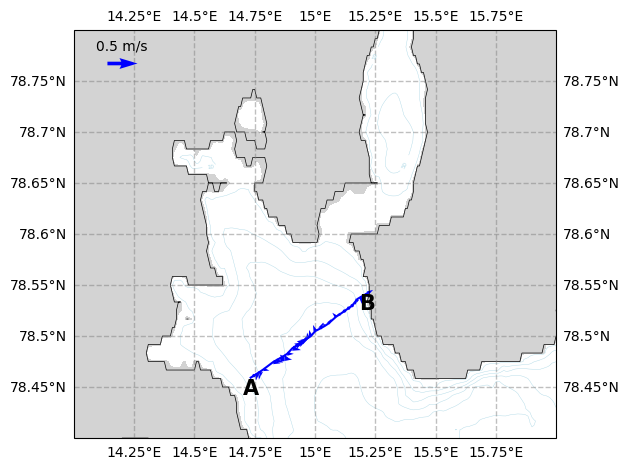

In [33]:
data_proj = ccrs.PlateCarree()
plt.figure(figsize=(9,9))

fig, ax = Oc.plot_empty_map(extent=[14.,16.,78.4,78.8], topography=os.path.join(path_data,"Svalbard_map_data/bathymetry_svalbard.mat"))

# First plot the shiptrack
ax.plot(ds_codas_nf.lon,ds_codas_nf.lat,transform=data_proj, color='b')

#Then plot the surface velocity as arrows
q = ax.quiver(ds_codas_nf.lon,ds_codas_nf.lat, ds_codas_nf.u.sel(depth=50., method="nearest"), ds_codas_nf.v.sel(depth=50., method="nearest"), scale=8., transform=data_proj, color = 'b')
# Put a legend for the arrows
plt.quiverkey(q,0.1,0.92,0.5,'0.5 m/s',color='blue',labelcolor='black',
                  transform=plt.gca().transAxes)

# Indicate on the map, where the section starts, and where it ends
ax.text(ds_codas_nf.lon[0],ds_codas_nf.lat[0],'A',transform=data_proj,fontweight='bold',
       horizontalalignment='center',verticalalignment='top',
       fontsize=15)
ax.text(ds_codas_nf.lon[-1],ds_codas_nf.lat[-1],'B',transform=data_proj,fontweight='bold',
       horizontalalignment='center',verticalalignment='top',
       fontsize=15)
plt.show()

And to combine CTD and ADCP data into the same section plots, use this function:

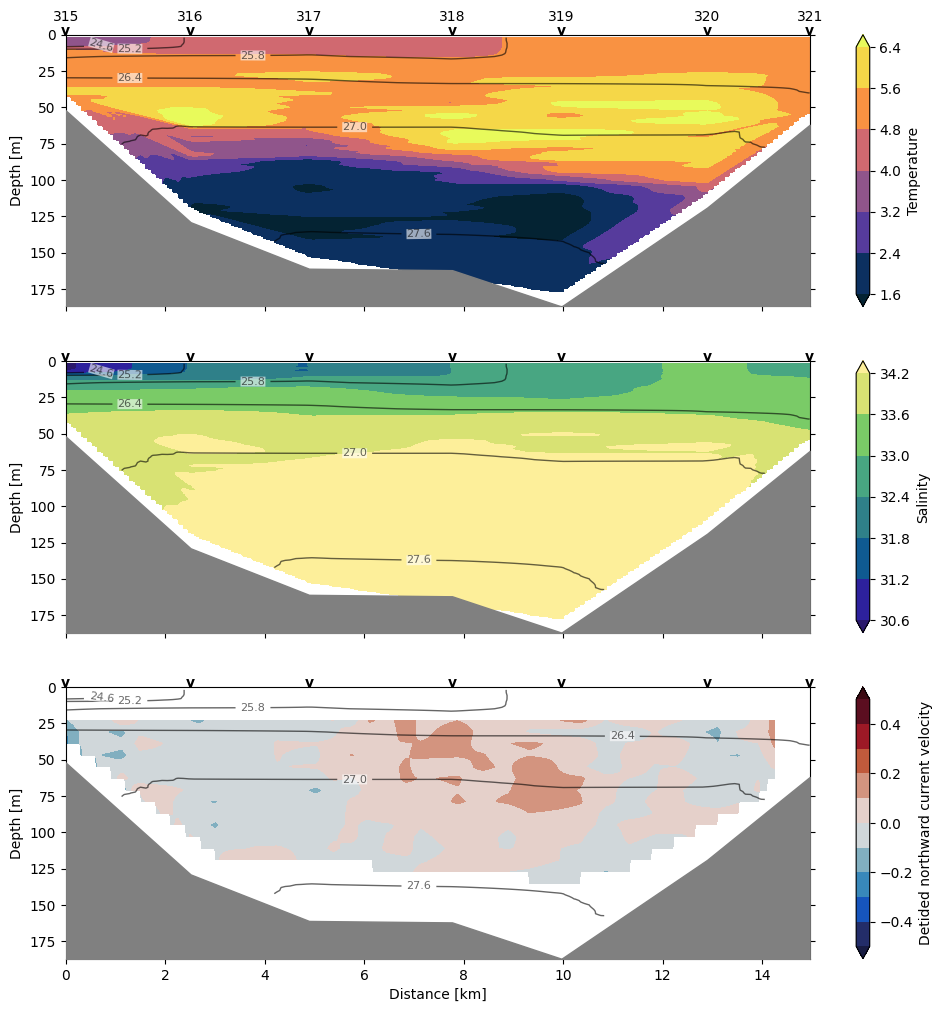

In [34]:
fig, axes, pics = Oc.plot_xarray_sections([ds_CTD_nf["T"], ds_CTD_nf["S"], ds_codas_nf["v_detide"]],
                          [cmo.cm.thermal, cmo.cm.haline, cmo.cm.balance],
                          list_clevels=[None, None, np.arange(-0.5, 0.50001, 0.1)],
                          da_contours=ds_CTD_nf["SIGTH"], interp=True)

To calculate baroclinic velocity from the given dataset:

Text(0, 0.5, 'Depth [m]')

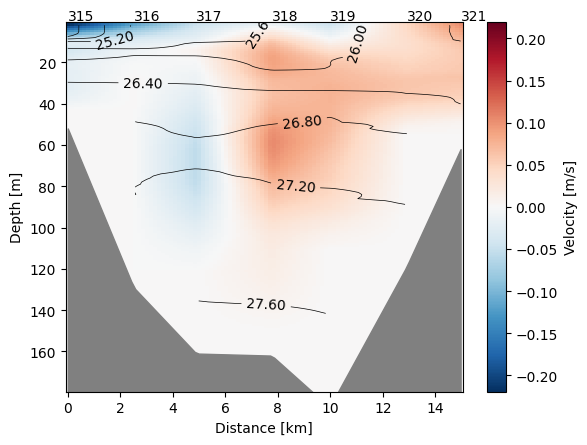

In [35]:
ds_CTD_nf = Oc.calc_baroclinic_velocity(ds_CTD_nf)

new_dist = np.linspace(ds_CTD_nf.station.distance.values.min(), ds_CTD_nf.station.distance.values.max(), 100)
ds_CTD_nf_interp = ds_CTD_nf.interp(distance=new_dist)

levels = np.linspace(ds_CTD_nf_interp.SIGTH.values.min(), ds_CTD_nf_interp.SIGTH.values.max(), 5)

fig, ax = plt.subplots()

v = ds_CTD_nf_interp.baroclinic_velocity.plot()
v.colorbar.set_label("Velocity [m/s]")

plt.gca().invert_yaxis()
ax.fill_between(ds_CTD_nf_interp.bottom_depth.distance, ds_CTD_nf_interp.bottom_depth.values, 190, color="gray")

for i, j in zip(ds_CTD_nf.station.distance.values, ds_CTD_nf.station.values):
    ax.text(i, -.5, f'{j}')

contour = plt.contour(ds_CTD_nf_interp.SIGTH.distance.values, ds_CTD_nf_interp.depth.values, ds_CTD_nf_interp.SIGTH.values, levels=10, colors="black", linewidths=.5)
plt.clabel(contour, inline=True, fontsize=10, fmt='%1.2f')

ax.set_xlabel('Distance [km]')
ax.set_ylabel('Depth [m]')

### Mooring

During the AGF-214 cruise, you will recover and re-deploy a set of moorings, which constantly monitor the in- and outflow of water in the mouth of Isfjorden. The following code snippets can help you to handle the data.

There are functions available to read the data from all the individual instruments deployed on the mooring. Furthermore, you have one function available to afterwards combine the hydropgraphy data (T,S,SIGTH) into an xarray dataset.

In [36]:
dict_mooring = {
    31: Oc.read_SBE37(os.path.join(path_data,"Mooring/SBE37/SBE37SM-RS232_03723000_2023_09_28.cnv")),
    49: Oc.read_RBR(os.path.join(path_data,"Mooring/RBRconcerto/206125_20230928_0909.rsk")),
    64: Oc.read_RBR(os.path.join(path_data,"Mooring/RBRsolo/205993_20230928_0641_upgraded.rsk"))
# the complete mooring contains many more instruments, but you get how it works ;)
}
ds_mooring = Oc.mooring_to_xarray(dict_mooring)

No pressure channel available, sea pressure will be set to 0.
/Users/pselle/Documents/Uni/Svalbard/Internship/UNISacis/git/unisacsi/unisacsi/Ocean.py:789: FutureWarning:

In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'depth' ('depth',) The recommendation is to set join explicitly for this case.



In [37]:
print(ds_mooring)

<xarray.Dataset> Size: 2MB
Dimensions:  (depth: 3, time: 25854)
Coordinates:
  * depth    (depth) float64 24B 31.0 49.0 64.0
  * time     (time) datetime64[ns] 207kB 2022-10-04T10:00:00 ... 2023-09-28T1...
Data variables:
    S        (time, depth) float64 620kB 33.75 33.74 nan ... 0.0116 nan nan
    SIGTH    (time, depth) float64 620kB 26.72 26.7 nan 26.7 ... -1.453 nan nan
    T        (time, depth) float64 620kB 4.643 4.773 4.28 ... 18.31 nan nan
Attributes:
    source:   mooring_to_xarry


In [38]:
ds_mooring_grid = ds_mooring.interpolate_na("time").sel(time=slice("2022-10-04 10:00:00", "2023-09-27 10:00:00"))
ds_mooring_grid = xr.merge([ds_mooring_grid[vari].dropna("depth", how="all").interp({"depth": np.arange(31., 64., 1.)}) for vari in ds_mooring_grid.data_vars])
print(ds_mooring_grid)

<xarray.Dataset> Size: 21MB
Dimensions:  (time: 25777, depth: 33)
Coordinates:
  * time     (time) datetime64[ns] 206kB 2022-10-04T10:00:00 ... 2023-09-27T1...
  * depth    (depth) float64 264B 31.0 32.0 33.0 34.0 ... 60.0 61.0 62.0 63.0
Data variables:
    S        (time, depth) float64 7MB 33.75 33.75 33.75 33.74 ... nan nan nan
    SIGTH    (time, depth) float64 7MB 26.72 26.72 26.72 26.72 ... nan nan nan
    T        (time, depth) float64 7MB 4.643 4.65 4.658 ... 5.508 5.481 5.454
Attributes:
    units:         
    orignal_name:  S []


Now it is very easy to plot time series from a certain depth or Hovmoeller plots of the different variables:

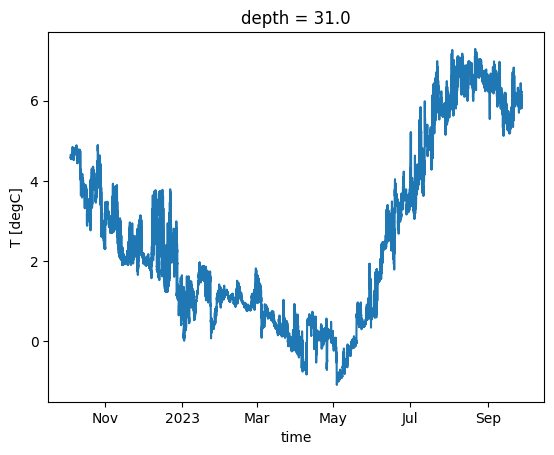

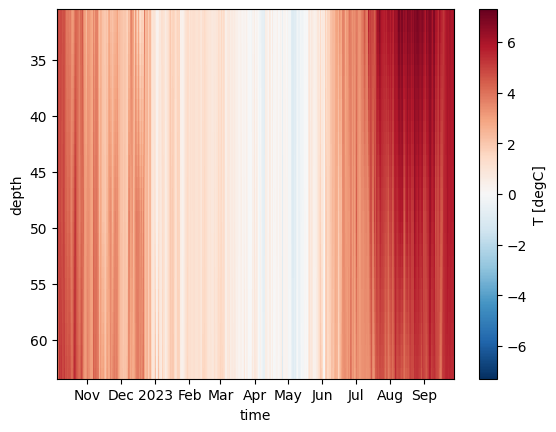

In [39]:
plt.figure()
ds_mooring_grid["T"].sel(depth=31.).plot(x="time")

plt.figure()
ds_mooring_grid["T"].plot(x="time")
plt.gca().invert_yaxis()

Have a look at the xarray documentation online to for further help on how to plot the data in a nicer way!

You also see that the last few data points are off, as the instruments were out of the water after the recovery. You should cut the time series:

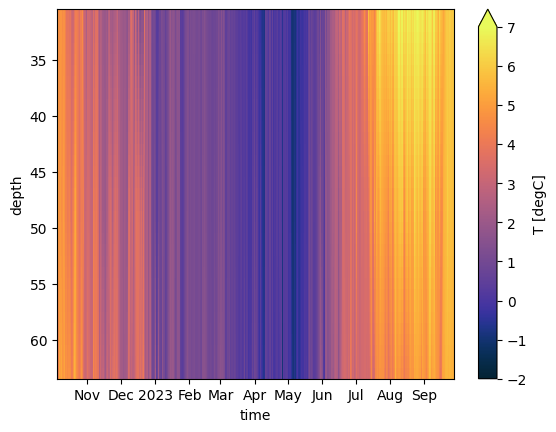

In [40]:
ds_mooring = ds_mooring.sel(time=slice("2022-09-28T10:00","2023-09-28T06:00:00"))
ds_mooring_grid = ds_mooring_grid.sel(time=slice("2022-09-28T10:00","2023-09-28T06:00:00"))

fig, ax = plt.subplots()
ds_mooring_grid["T"].plot(ax=ax, x="time", vmin=-2., vmax=7., cmap=cmo.cm.thermal)
ax.invert_yaxis()

### Tidal analysis

The toolbox contains a few functions to do spectral and tidal analyses. If you suspect a periodic signal in a time series (e.g. a tidal signal), the first thing to do is typically to look at a spectrum, to identify the frequencies and match them with theoretical knowledge.

Name of columns: ['RECORD', 'Battery_Voltage [V]', 'Memory_Used [Bytes]', 'Last_Interval [ms]', 'Time_Correction [ms]', 'p [kPa]', 'T [degC]', 'OX [uM]', 'AirSaturation [%]', 'T [deg.C]', 'Speed_abs [cm/s]', 'Dir [deg.M]', 'v [cm/s]', 'u [cm/s]', 'Heading [deg.M]', 'Tilt_X [deg]', 'Tilt_Y [deg]', 'SP_Std [cm/s]', 'Strength [dB]', 'Ping_Count', 'Abs_Tilt [deg]', 'Max_Tilt [deg]', 'Std_Tilt [deg]', 'p [dbar]']


<Axes: xlabel='TIMESTAMP'>

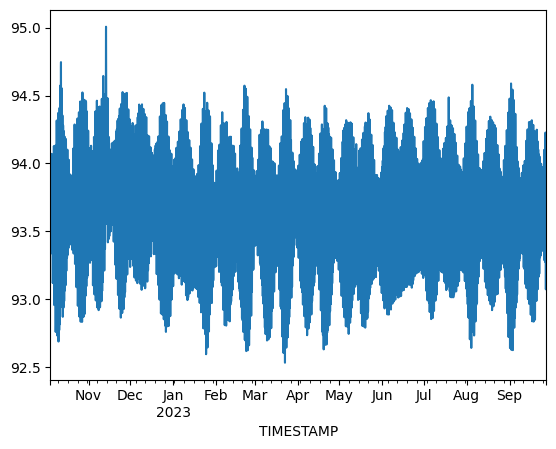

In [41]:
df = Oc.read_Seaguard(os.path.join(path_data,"Mooring/SeaGuard/Seaguard_2370.txt"))
df = df[:"2023-09-27T15"]
print("Name of columns:",list(df.columns))   # to see the names of the columns
df["p [dbar]"].plot()

To make the tidal analysis as easy as possible use the class 'tide'. You can also access every function without using the class.

In [42]:
help(Oc.tide)

Help on class tide in module unisacsi.Ocean:

class tide(builtins.object)
 |  tide(t=None, p=None, u=None, v=None, lat=None, constituents='auto', add_vari=None, df_const=None, single_val=None, orignal=None, **args) -> 'None'
 |
 |  Methods defined here:
 |
 |  __bool__(self) -> 'bool'
 |      # be careful, but should work
 |
 |  __contains__(self, key) -> 'bool'
 |
 |  __dir__(self) -> 'list[str]'
 |      Default dir() implementation.
 |
 |  __eq__(self, other) -> 'bool'
 |      Return self==value.
 |
 |  __getitem__(self, key) -> 'Any'
 |
 |  __init__(self, t=None, p=None, u=None, v=None, lat=None, constituents='auto', add_vari=None, df_const=None, single_val=None, orignal=None, **args) -> 'None'
 |      Class to simplefy the work with tides.
 |
 |      Can be called in 3 different ways:
 |
 |      1. **using current (u/v) data**
 |          Analyzes horizontal current velocity components (u and v).
 |
 |          Args:
 |              t (array_like): Time index of the data.
 |       

To analyse pressure data you initiate the funciton like this:

In [43]:
p_tide = Oc.tide(t=df.index,p=df["p [dbar]"], lat=78.122)

solve: matrix prep ... solution ... done.


The amplitudes of the individual constituents tell you how important they are:

In [44]:
print("Constituents:",p_tide.constituents)

Constituents:       amplitude  amplitude_ci  phase [deg]  phase_ci [deg]            snr  \
M2     0.515675      0.001664   353.398001        0.184913  368798.005040   
S2     0.196677      0.001664    37.675709        0.484843   53649.250648   
N2     0.100423      0.001664   329.923715        0.949531   13986.001419   
K1     0.069042      0.001371   219.921108        1.137503    9745.502299   
K2     0.056168      0.001664    36.495649        1.697701    4375.607176   
O1     0.030080      0.001371    90.279389        2.611091    1850.138651   
M6     0.019337      0.001128   269.204556        3.341313    1129.560307   
P1     0.021450      0.001371   213.865738        3.661169     940.546409   
Q1     0.018604      0.001371     2.513042        4.221017     707.508754   
NU2    0.020452      0.001664   329.278414        4.662639     580.127182   
2MS6   0.013014      0.001128   338.207394        4.964874     511.681828   
2MN6   0.011654      0.001128   222.746678        5.543955    

With pressure data you can obtain a spectral analysis to identify dominant frequencies and their amplitudes. This allows you to detect periodic signals such as tidal oscillations or other oceanographic phenomena in your time series data.

In [45]:
p_tide.calc_spectrum(bandwidth=8)

0.000000     2.073761e+05
0.002792     2.073396e+05
0.005583     2.072126e+05
0.008375     2.069699e+05
0.011167     2.065298e+05
                 ...     
11.987437    1.166474e-06
11.990229    1.077965e-06
11.993021    7.735514e-07
11.995812    8.322582e-07
11.998604    7.136882e-07
Length: 4299, dtype: float64

Plotting spectrum excluding some constituents


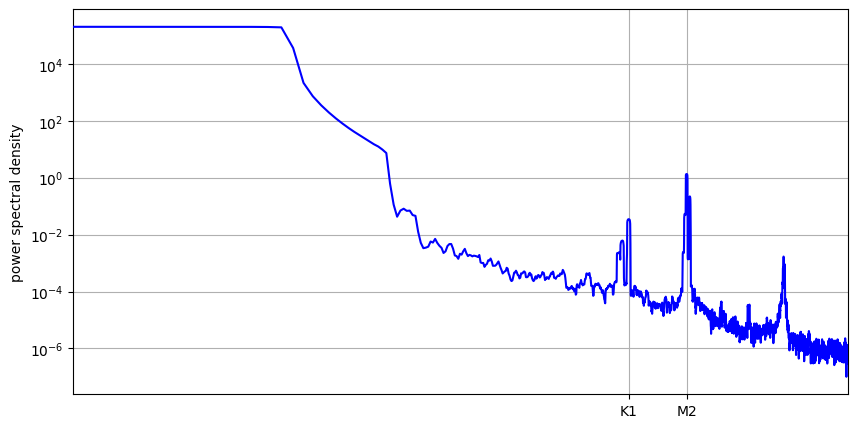

Plotting spectrum with selected constituents


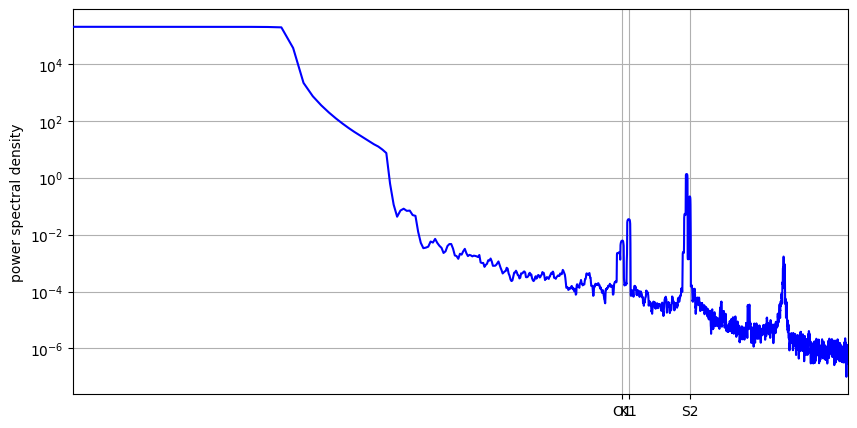

Plotting spectrum with all constituents


(<Figure size 1000x500 with 1 Axes>, <Axes: ylabel='power spectral density'>)

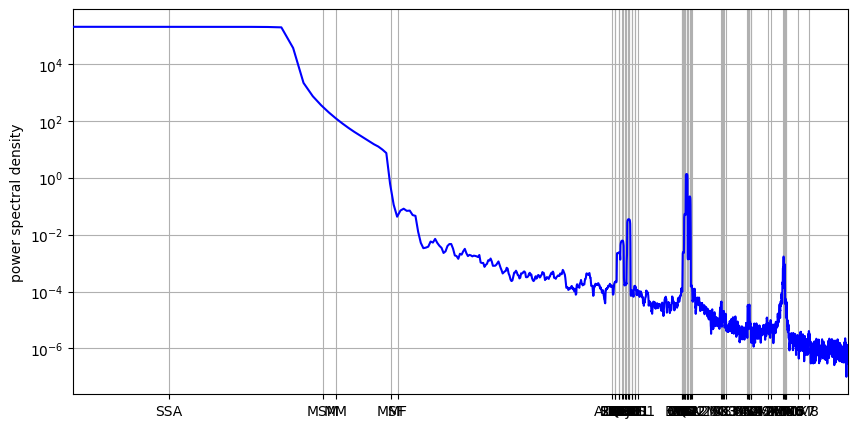

In [46]:
#there are different ways to plot the spectrum:
# by excluding constituents
print("Plotting spectrum excluding some constituents")
p_tide.plot_spectrum(exclude_constituents=['S2','N2','K2', 'O1', 'NU2', 'SO3', 'UPS1', 'MK3', 'RHO1', 'MU2', 'THE1', 'MKS2', 'M3', 'BET1', 'SSA', 'LDA2', 'MO3', 'CHI1', 'NO1', 'SIG1', 'ETA2', '2Q1', 'PHI1', '2SM6', 'Q1', 'J1', 'SO1', 'P1', 'OQ2', 'TAU1', 'M4', 'SN4', 'OO1', 'SK3', 'MM', '2MS6', 'ALP1', 'L2', 'MN4', '2SK5', '2MK6', 'MSF', '2MK5', 'MSK6', 'MS4', 'MF', 'MSN2', 'EPS2', '2N2', '3MK7', '2MN6', 'MSM', 'MK4', 'S4', 'M8', 'SK4', 'M6'])
plt.show()
# or by selecting constituents
print("Plotting spectrum with selected constituents")
p_tide.plot_spectrum(constituents=['S2','K1', 'O1'])
plt.show()
# or by plotting all consituents
print("Plotting spectrum with all constituents")
p_tide.plot_spectrum()

Once you have identified the most important tidal frequencies in the time series, you probably want to do a harmonic analysis and remove the tidal variations from the time series:

If you are not sure, which tidal frequencies to include in the harmonic analysis, you start with all available ones.

In [47]:
p_tide.reconstruct(constituents=['S2','K1', 'O1']) # reconstructs the tide using only the selected constituents, to include all constituents leave the argument out

prep/calcs ... done.


,p,p_atide,p_detide
TIMESTAMP,,,
2022-10-04 11:00:00,93.686248,0.069973,93.471927
2022-10-04 12:00:00,93.788583,0.172308,93.220692
2022-10-04 13:00:00,93.850341,0.234066,93.169634
2022-10-04 14:00:00,93.859525,0.243250,93.252450
2022-10-04 15:00:00,93.818153,0.201878,93.379622
...,...,...,...
2023-09-27 11:00:00,93.573623,-0.042652,94.238052
2023-09-27 12:00:00,93.675145,0.058870,94.017330
2023-09-27 13:00:00,93.739222,0.122947,93.755853


Here the time series before and after the tidal removal:

(<Figure size 1000x333.333 with 1 Axes>, [<Axes: >])

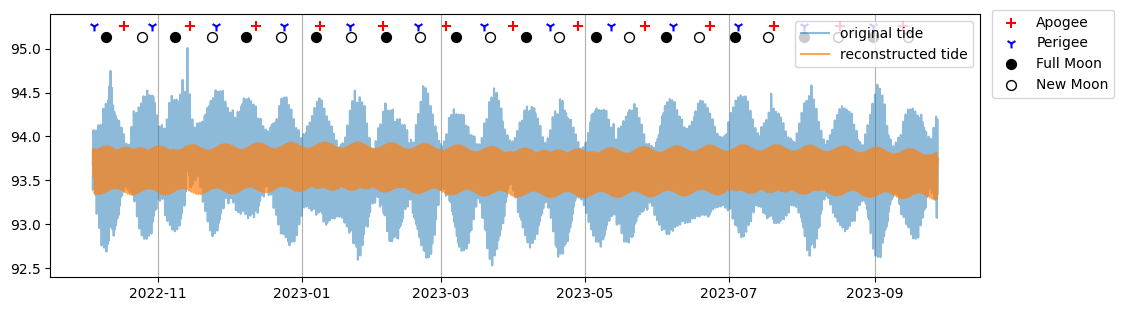

In [48]:
Oc.plot_tidal_time_series(p_tide.p,p_tide.t, p_tide.recon.p,label="original tide",transparent_labels="reconstructed tide")

If you analyse currents you can plot tidal elipses.

solve: matrix prep ... solution ... done.


(<Figure size 640x480 with 2 Axes>, <GeoAxes: >, <AxesHostAxes: >)

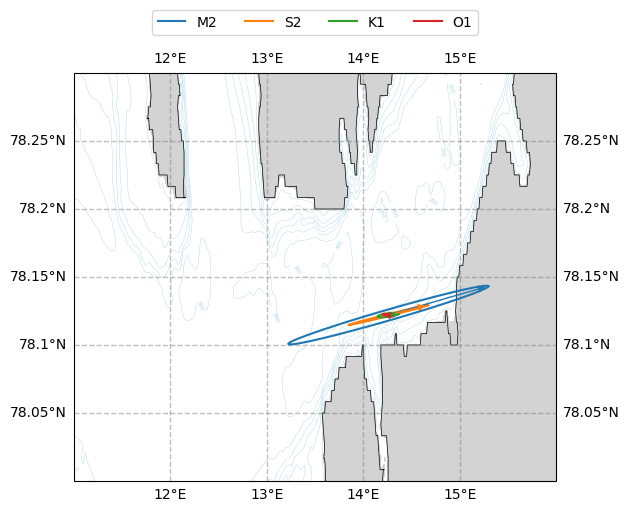

In [49]:
uv_tide = Oc.tide(t=df.index, u=df["u [cm/s]"], v=df["v [cm/s]"], lat=78.122)
uv_tide.plot_map_tidal_ellipses(constituents=['M2', 'S2', 'K1', 'O1'],topography=os.path.join(path_data,"Svalbard_map_data/bathymetry_svalbard.mat")) 
# you can also exclude constituents here, e.g. exclude_constituents=['M2', 'S2', 'K1', 'O1', 'N2']

prep/calcs ... done.


(<Figure size 1000x666.667 with 2 Axes>,
 array([<Axes: >, <Axes: >], dtype=object))

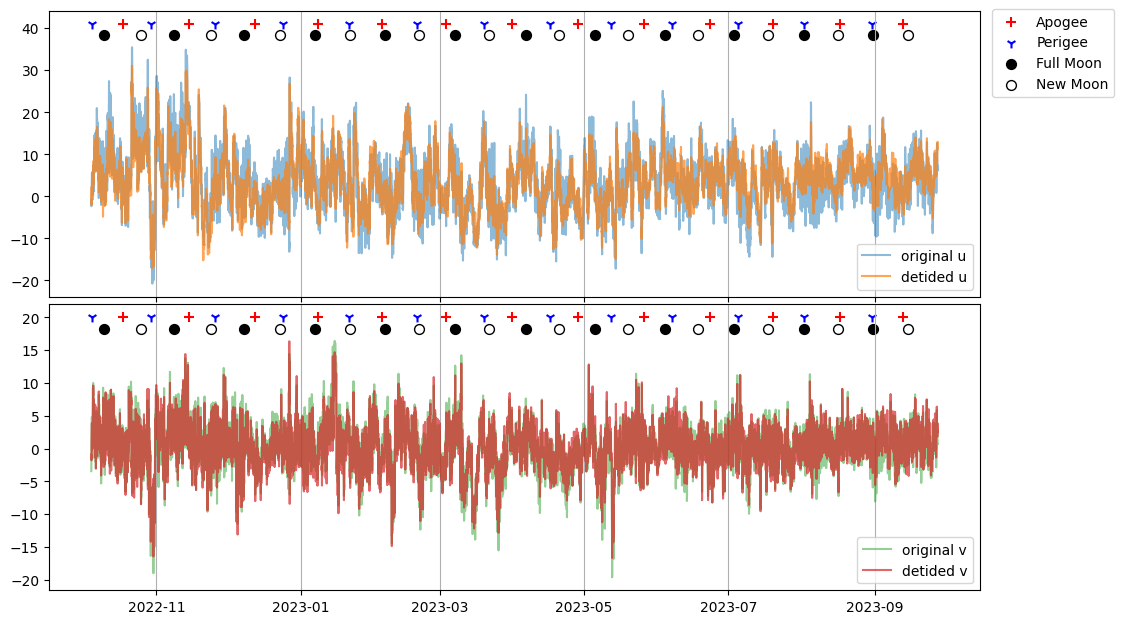

In [50]:
uv_tide.reconstruct()
Oc.plot_tidal_time_series([uv_tide.u,uv_tide.v], uv_tide.t, [uv_tide.recon.u_detide,uv_tide.recon.v_detide], label=["original u","original v"], transparent_labels=["detided u","detided v"])

You can also check a tidal time series from a tidal model:

<Axes: xlabel='TIMESTAMP'>

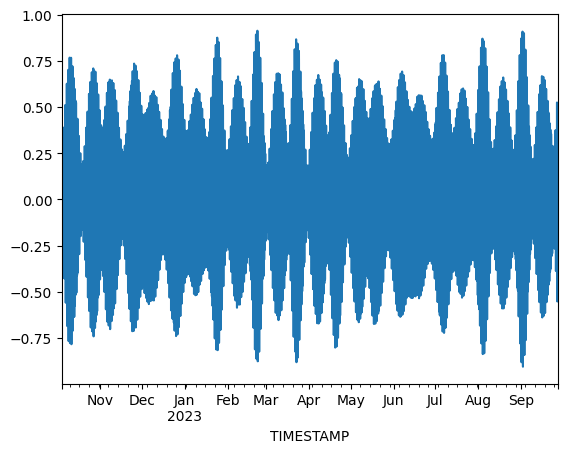

In [ ]:
df_tides = Oc.get_tidal_uvh(78.04989, 13.52047, df.index, os.path.join(path_data,"Tidal_models/"), "Arc2kmTM")

df_tides["h [m]"].plot()

## Meteorology

### Download AROME-Arctic model data

You can download model data from AROME-Arctic using the following functions. The configurations are set in an extra configuration file (also provided on github)

Create the static fields first and then download the data.

In [51]:
download_MET_model_static_fields(os.path.join(path_data,"AROME_ARCTIC/config_model_download.yml"))
download_MET_model_data(os.path.join(path_data,"AROME_ARCTIC/config_model_download.yml"))

Static fields were successfully saved into /Users/pselle/Desktop/AA_static_fields_2p5km.nc.
############################################################
start downloading data from 2022-10-22
############################################################


/Users/pselle/Documents/Uni/Svalbard/Internship/UNISacis/git/unisacsi/unisacsi/MET_model_download.py:173: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



Done downloading https://thredds.met.no/thredds/dodsC/aromearcticarchive/2022/10/22/arome_arctic_det_2_5km_20221022T00Z.nc.
Done downloading https://thredds.met.no/thredds/dodsC/aromearcticarchive/2022/10/22/arome_arctic_det_2_5km_20221022T03Z.nc.
Done downloading https://thredds.met.no/thredds/dodsC/aromearcticarchive/2022/10/22/arome_arctic_det_2_5km_20221022T06Z.nc.
Done downloading https://thredds.met.no/thredds/dodsC/aromearcticarchive/2022/10/22/arome_arctic_det_2_5km_20221022T09Z.nc.
Done downloading https://thredds.met.no/thredds/dodsC/aromearcticarchive/2022/10/22/arome_arctic_det_2_5km_20221022T12Z.nc.
Done downloading https://thredds.met.no/thredds/dodsC/aromearcticarchive/2022/10/22/arome_arctic_det_2_5km_20221022T15Z.nc.
Done downloading https://thredds.met.no/thredds/dodsC/aromearcticarchive/2022/10/22/arome_arctic_det_2_5km_20221022T18Z.nc.
Done downloading https://thredds.met.no/thredds/dodsC/aromearcticarchive/2022/10/22/arome_arctic_det_2_5km_20221022T21Z.nc.
########

/Users/pselle/Documents/Uni/Svalbard/Internship/UNISacis/git/unisacsi/unisacsi/MET_model_download.py:173: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



Done downloading https://thredds.met.no/thredds/dodsC/aromearcticarchive/2022/10/23/arome_arctic_det_2_5km_20221023T00Z.nc.
Done downloading https://thredds.met.no/thredds/dodsC/aromearcticarchive/2022/10/23/arome_arctic_det_2_5km_20221023T03Z.nc.
Done downloading https://thredds.met.no/thredds/dodsC/aromearcticarchive/2022/10/23/arome_arctic_det_2_5km_20221023T06Z.nc.
Done downloading https://thredds.met.no/thredds/dodsC/aromearcticarchive/2022/10/23/arome_arctic_det_2_5km_20221023T09Z.nc.
Done downloading https://thredds.met.no/thredds/dodsC/aromearcticarchive/2022/10/23/arome_arctic_det_2_5km_20221023T12Z.nc.
Done downloading https://thredds.met.no/thredds/dodsC/aromearcticarchive/2022/10/23/arome_arctic_det_2_5km_20221023T15Z.nc.
Done downloading https://thredds.met.no/thredds/dodsC/aromearcticarchive/2022/10/23/arome_arctic_det_2_5km_20221023T21Z.nc.
############################################################
start downloading data from 2022-10-24
################################

/Users/pselle/Documents/Uni/Svalbard/Internship/UNISacis/git/unisacsi/unisacsi/MET_model_download.py:173: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



Done downloading https://thredds.met.no/thredds/dodsC/aromearcticarchive/2022/10/24/arome_arctic_det_2_5km_20221024T00Z.nc.
Done downloading https://thredds.met.no/thredds/dodsC/aromearcticarchive/2022/10/24/arome_arctic_det_2_5km_20221024T03Z.nc.
Done downloading https://thredds.met.no/thredds/dodsC/aromearcticarchive/2022/10/24/arome_arctic_det_2_5km_20221024T06Z.nc.
Done downloading https://thredds.met.no/thredds/dodsC/aromearcticarchive/2022/10/24/arome_arctic_det_2_5km_20221024T09Z.nc.
Done downloading https://thredds.met.no/thredds/dodsC/aromearcticarchive/2022/10/24/arome_arctic_det_2_5km_20221024T12Z.nc.
Done downloading https://thredds.met.no/thredds/dodsC/aromearcticarchive/2022/10/24/arome_arctic_det_2_5km_20221024T15Z.nc.
Done downloading https://thredds.met.no/thredds/dodsC/aromearcticarchive/2022/10/24/arome_arctic_det_2_5km_20221024T18Z.nc.
Done downloading https://thredds.met.no/thredds/dodsC/aromearcticarchive/2022/10/24/arome_arctic_det_2_5km_20221024T21Z.nc.


### Time series plots

Most of the data we sample during the meteorology fieldwork is simple time series data. Functions to read the data are available in the Meteo module (Check the docs!). The following code is just an example of how to read and plot the data from a radiometer or several Tinytags:

Using TT as a sensor.
Using TH as a sensor.
Using CEB as a sensor.


                     RECORD  CM3Up_Avg [W/meter²]  CM3Dn_Avg [W/meter²]  \
TIMESTAMP                                                                 
2022-02-11 11:45:00     815                 0.918                 0.955   
2022-02-11 11:50:00     816                 2.023                 2.079   
2022-02-11 11:55:00     817                 2.210                 2.191   
2022-02-11 12:00:00     818                 1.124                 1.124   
2022-02-11 12:05:00     819                 1.124                 1.124   

                     CG3Up_Avg [W/meter²]  CG3Dn_Avg [W/meter²]  \
TIMESTAMP                                                         
2022-02-11 11:45:00                -15.69                -6.402   
2022-02-11 11:50:00                -10.93                -4.728   
2022-02-11 11:55:00                -10.49                -5.062   
2022-02-11 12:00:00                -12.03                -5.232   
2022-02-11 12:05:00                -13.26                -5.652   

    

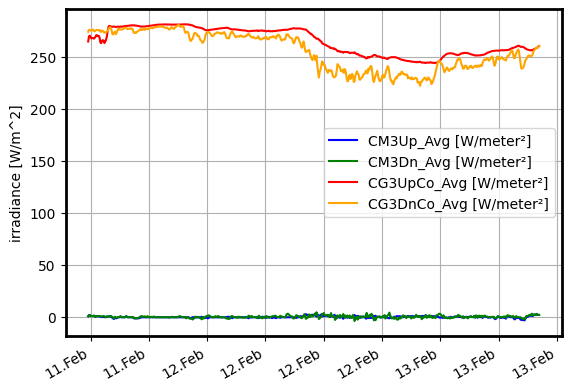

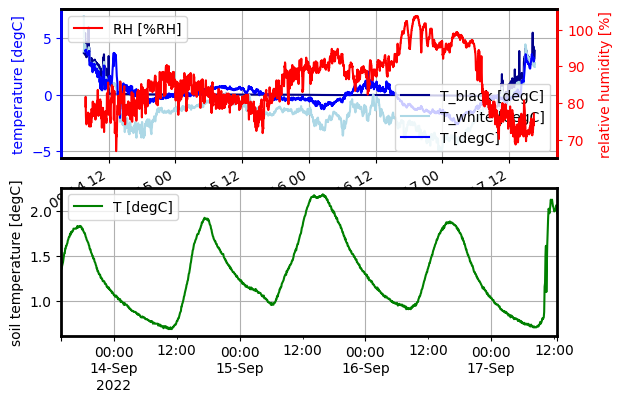

In [ ]:
# Radiation
df_rad = Met.read_Campbell_TOA5(os.path.join(path_data, "Radiation_SEB/TOA5_19688.rad_2022_02_11_1145.dat"))
print(df_rad.head())
    
fig, ax = plt.subplots(1,1)
with pd.plotting.plot_params.use('x_compat', True):
    df_rad.plot(y="CM3Up_Avg [W/meter²]", ax=ax, c="b")
    df_rad.plot(y="CM3Dn_Avg [W/meter²]", ax=ax, c="g")
    df_rad.plot(y="CG3UpCo_Avg [W/meter²]", ax=ax, c="r")
    df_rad.plot(y="CG3DnCo_Avg [W/meter²]", ax=ax, c="orange")
ax.set_xlabel(None)
ax.set_ylabel("irradiance [W/m^2]")
ax.grid("both")
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%d.%b'))



# TinyTags
df_TT = Met.read_Tinytag(os.path.join(path_data, "TinyTags/20220917_TT3.txt"))
df_TH = Met.read_Tinytag(os.path.join(path_data, "TinyTags/20220917_TH6.txt"))
df_CEB = Met.read_Tinytag(os.path.join(path_data, "TinyTags/20220917_CEB1.txt"))

fig, (ax_T, ax_CEB) = plt.subplots(2,1)
ax_RH = ax_T.twinx()
df_TT.plot(y="T_black [degC]", ax=ax_T, c="darkblue")
df_TT.plot(y="T_white [degC]", ax=ax_T, c="lightblue")
df_TH.plot(y="T [degC]", ax=ax_T, c="b")
df_TH.plot(y="RH [%RH]", ax=ax_RH, c="r")
ax_T.set_xlabel(None)
ax_T.set_ylabel("temperature [degC]", c="b")
ax_RH.set_ylabel("relative humidity [%]", c="r")
ax_RH.spines['left'].set_color('b')
ax_RH.spines['right'].set_color('r')
ax_T.tick_params(axis='y', colors="b", labelcolor="b")
ax_RH.tick_params(axis='y', colors="r", labelcolor="r")
ax_T.grid("both")
ax_T.legend(loc="lower right")
ax_RH.legend(loc="upper left")

df_CEB.plot(y="T [degC]", ax=ax_CEB, c="g")
ax_CEB.set_xlabel(None)
ax_CEB.set_ylabel("soil temperature [degC]")
ax_CEB.grid()

Besides time series plots, you might want to plot data on a map. Examples are model data from AROME-Arctic or IWIN measurements from the boats on Isfjorden. The Meteo module provides a set of functions to create different kinds of maps, please check the docs and decide, which type might be suited best for your specific plot. An example:

Changing the path_mapdata for the object to '/Users/pselle/Documents/Uni/Svalbard/Internship/UNISacis/Data/unisacsi_example_data/Svalbard_map_data/'. 


Text(0, 0.5, '2m temperature')

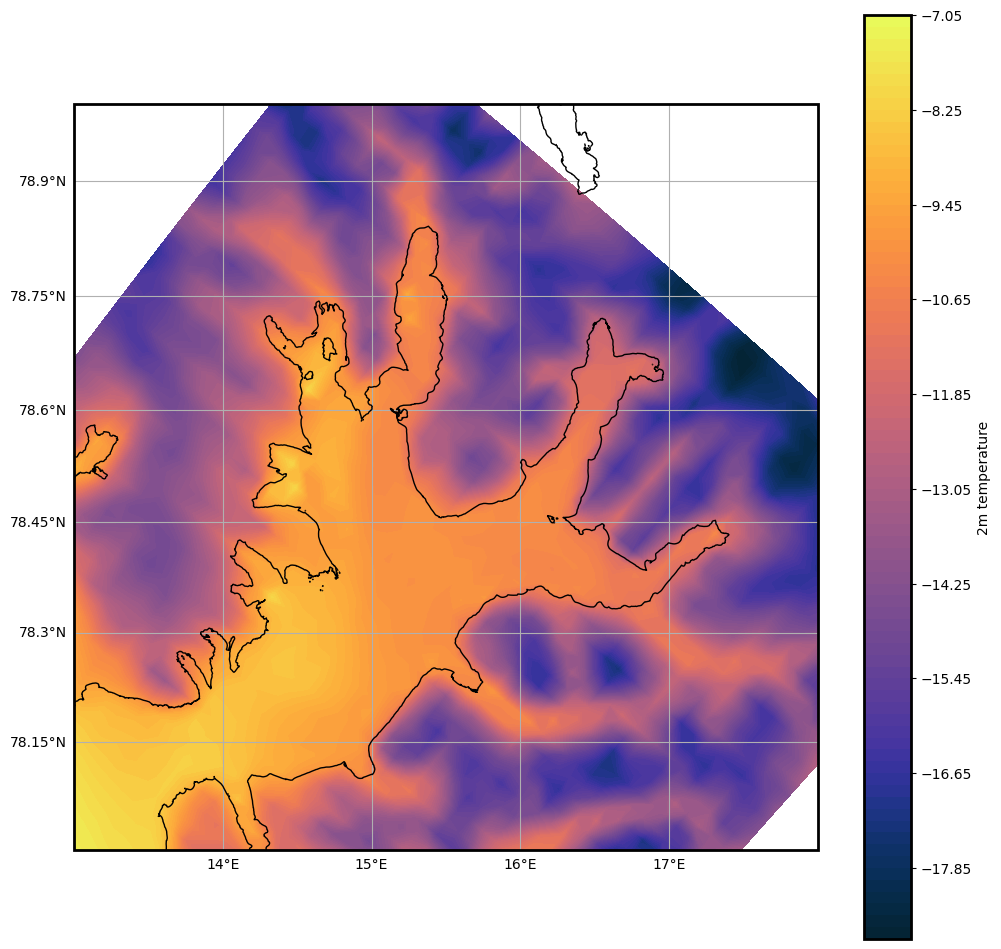

In [53]:
aa = Met.read_AROME(os.path.join(path_data,"AROME_ARCTIC/AA_nearsurface_2p5km_20220503.nc"))
    
IsfjordMap = Met.MapGenerator([78., 79.],[13., 18.],subplots_parameters={"figsize":(12,12)}).add_coastline(1,"k",path_mapdata=os.path.join(path_data,"Svalbard_map_data/"))

ax=IsfjordMap.get_ax()[0]

pic = ax.contourf(aa.longitude, aa.latitude, aa.T_air_2m.sel(time="2022-05-03 12:00:00")-273.15, levels=100, cmap=cmo.cm.thermal, transform=ccrs.PlateCarree())
cbar = plt.colorbar(pic, ax=ax)
cbar.ax.set_ylabel("2m temperature")